# CPE721 - Redes Neurais Feedforward

**Data Set**: Student Performance Data Set

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., **Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008)** pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. [Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Importação do Data Set

In [2]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

In [3]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Junção dos Data Sets:

In [5]:
#df_por.merge(df_mat, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])[['G1_y', 'G2_y', 'G3_y']]
#df_por.rename(columns={"G1": "G1_por", "G2": "G2_por", "G3": "G3_por"}, inplace=True)

In [6]:
#df = df_por.copy()
#df['G1_mat'] = df_mat['G1']
#df['G2_mat'] = df_mat['G2']
#df['G3_mat'] = df_mat['G3']
df = df_por.copy()

## 2. Pré-Processamento

**Descrição das *features***:\
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) \
2 sex - student's sex (binary: "F" - female or "M" - male) \
3 age - student's age (numeric: from 15 to 22) \
4 address - student's home address type (binary: "U" - urban or "R" - rural) \
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) \
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart) \
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) \
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) \
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") \
12 guardian - student's guardian (nominal: "mother", "father" or "other") \
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) \
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) \
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) \
16 schoolsup - extra educational support (binary: yes or no) \
17 famsup - family educational support (binary: yes or no) \
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) \
19 activities - extra-curricular activities (binary: yes or no) \
20 nursery - attended nursery school (binary: yes or no) \
21 higher - wants to take higher education (binary: yes or no) \
22 internet - Internet access at home (binary: yes or no) \
23 romantic - with a romantic relationship (binary: yes or no) \
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) \
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) \
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) \
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) \
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) \
29 health - current health status (numeric: from 1 - very bad to 5 - very good) \
30 absences - number of school absences (numeric: from 0 to 93)

**Tipos de *features***:
* 13 variáveis binárias;
* 4 variáveis categóricas nominais (sem relação numérica);
* 13 variáveis numéricas (inteiras).

In [7]:
var_bin = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
var_nom = ['Mjob', 'Fjob', 'reason', 'guardian']
var_num = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

### 2.1 Variáveis binárias

* Substituição das 13 variáveis binárias em texto por {-1, +1}

In [8]:
df['school'].replace({'GP': -1, 'MS': 1}, inplace=True)
df['sex'].replace({'F': -1, 'M': 1}, inplace=True)
df['address'].replace({'R': -1, 'U': 1}, inplace=True)
df['famsize'].replace({'LE3': -1, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'A': -1, 'T': 1}, inplace=True)
df['schoolsup'].replace({'no': -1, 'yes': 1}, inplace=True)
df['famsup'].replace({'no': -1, 'yes': 1}, inplace=True)
df['paid'].replace({'no': -1, 'yes': 1}, inplace=True)
df['activities'].replace({'no': -1, 'yes': 1}, inplace=True)
df['nursery'].replace({'no': -1, 'yes': 1}, inplace=True)
df['higher'].replace({'no': -1, 'yes': 1}, inplace=True)
df['internet'].replace({'no': -1, 'yes': 1}, inplace=True)
df['romantic'].replace({'no': -1, 'yes': 1}, inplace=True)

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


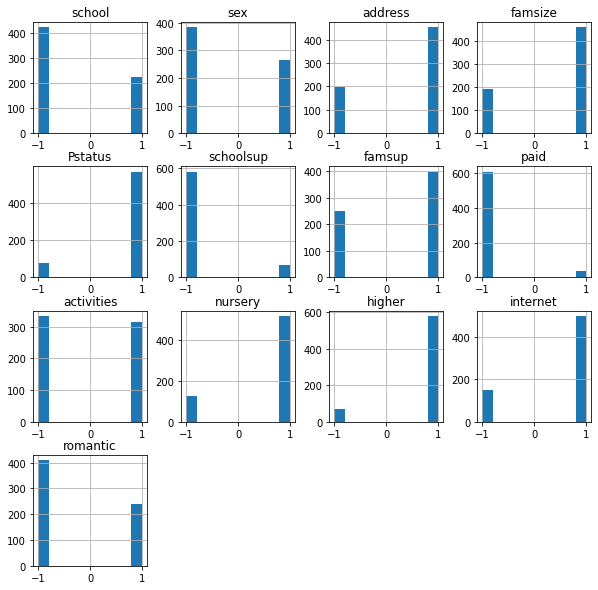

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax1 = plt.subplots(figsize=(10,10))
df.hist(var_bin,ax=ax1)
plt.show()
plt.tight_layout()

Algumas constatações:
* Poucos alunos moram sozinhos (Pstatus)
* Poucos com educação complementar (schoolsup)
* Poucos que pagam por cursos suplementares (paid
* Poucos nãoquerem cursar educação superior

Na hora de amostrar os datasets, tentar amostrar de forma igualitária

### 2.2 Variáveis categóricas nominais

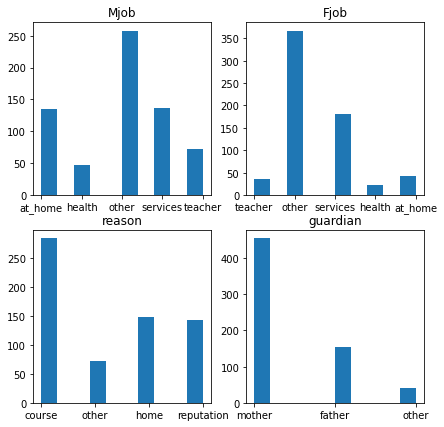

In [10]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
axs[0,0].hist(df['Mjob'])
axs[0,0].set_title('Mjob')
axs[0,1].hist(df['Fjob'])
axs[0,1].set_title('Fjob')
axs[1,0].hist(df['reason'])
axs[1,0].set_title('reason')
axs[1,1].hist(df['guardian'])
axs[1,1].set_title('guardian')
plt.show()

* Conversão das variáveis nominais em notação binária maximamente esparsa

In [11]:
df['Mjob']=pd.get_dummies(df['Mjob']).replace({0:-1}).values.tolist()
df['Fjob']=pd.get_dummies(df['Fjob']).replace({0:-1}).values.tolist()
df['reason']=pd.get_dummies(df['reason']).replace({0:-1}).values.tolist()
df['guardian']=pd.get_dummies(df['guardian']).replace({0:-1}).values.tolist()

#Mjob = df_por[['Mjob']]
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc.fit_transform(Mjob).toarray()

### 2.3 Variáveis numéricas

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


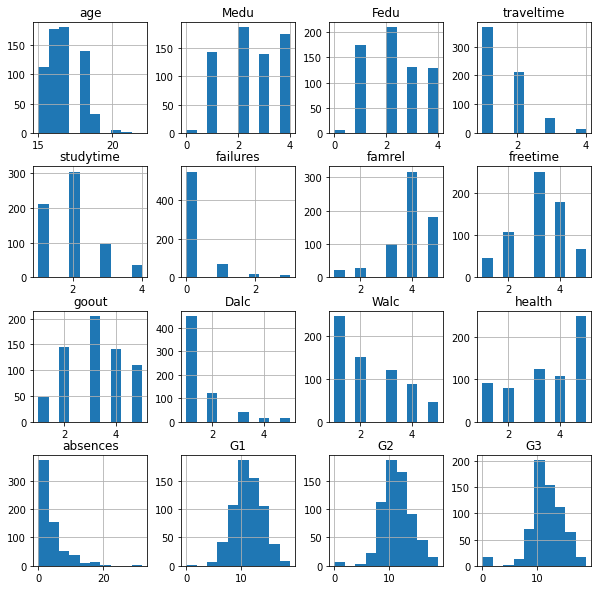

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax1 = plt.subplots(figsize=(10,10))
df.hist(var_num,ax=ax1)
plt.show()
plt.tight_layout()

### 2.3 Normalização (*Scaling*)

In [13]:
from sklearn.preprocessing import StandardScaler
scalerG3 = StandardScaler().fit(df[['G3']])
Y = scalerG3.transform(df[['G3']])

In [14]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-1,-1,18,1,1,-1,4,4,"[1, -1, -1, -1, -1]","[-1, -1, -1, -1, 1]",...,4,3,4,1,1,3,4,0,11,11
1,-1,-1,17,1,1,1,1,1,"[1, -1, -1, -1, -1]","[-1, -1, 1, -1, -1]",...,5,3,3,1,1,3,2,9,11,11
2,-1,-1,15,1,-1,1,1,1,"[1, -1, -1, -1, -1]","[-1, -1, 1, -1, -1]",...,4,3,2,2,3,3,6,12,13,12
3,-1,-1,15,1,1,1,4,2,"[-1, 1, -1, -1, -1]","[-1, -1, -1, 1, -1]",...,3,2,2,1,1,5,0,14,14,14
4,-1,-1,16,1,1,1,3,3,"[-1, -1, 1, -1, -1]","[-1, -1, 1, -1, -1]",...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,-1,19,-1,1,1,2,3,"[-1, -1, -1, 1, -1]","[-1, -1, 1, -1, -1]",...,5,4,2,1,2,5,4,10,11,10
645,1,-1,18,1,-1,1,3,1,"[-1, -1, -1, -1, 1]","[-1, -1, -1, 1, -1]",...,4,3,4,1,1,1,4,15,15,16
646,1,-1,18,1,1,1,1,1,"[-1, -1, 1, -1, -1]","[-1, -1, 1, -1, -1]",...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,-1,1,3,1,"[-1, -1, -1, 1, -1]","[-1, -1, -1, 1, -1]",...,2,4,5,3,4,2,6,10,10,10


In [15]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# cat_pipeline = Pipeline([
#     ('one_hot', OneHotEncoder(sparse=False)),
# ])

from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, var_num[:-3]),
])

df2 = pd.DataFrame(
     data = full_pipeline.fit_transform(df_por),
     columns = var_num[:-3])

In [16]:
oh_Mjob=pd.get_dummies(df_por['Mjob']).replace({0:-1}).values
oh_Fjob=pd.get_dummies(df_por['Fjob']).replace({0:-1}).values
oh_reason=pd.get_dummies(df_por['reason']).replace({0:-1}).values
oh_guardian=pd.get_dummies(df_por['guardian']).replace({0:-1}).values

X = np.hstack((df2.values, df[var_bin].values, oh_Mjob, oh_Fjob, oh_reason, oh_guardian))

In [30]:
X.shape
np.savetxt('X.txt',X,delimiter=',')
np.savetxt('y.txt',y)

## 3. Baseline: SVM

In [18]:
y = (df.G3 > 10).astype(int).replace({0:-1}).values

In [19]:
from sklearn import svm
from sklearn.model_selection import  KFold, GridSearchCV

In [20]:

# C_range = np.arange(1,10.1,0.1)
# gamma_range = np.logspace(-5,1,7)
# param_grid = [dict(C=C_range, gamma=gamma_range)]

# # Parameters
# K =  10      # k-fold parameter

# # Cross-validation
# cv = KFold(n_splits=K)
# grid = GridSearchCV(svm.SVC(kernel='rbf',cache_size=1000), param_grid=param_grid, cv=cv, n_jobs=-1,verbose=1)
# grid.fit(X,y)

In [21]:
# best_std_score = grid.cv_results_['std_test_score'][grid.best_index_]

# # Results:
# print("Best parameters: %s \nAccuracy: %0.3f \u00B1 %0.3f"
#       % (grid.best_params_, grid.best_score_, best_std_score))

## 4. Rede Neural Feedforward

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
from neupy import algorithms, layers

nn = layers.join(
        layers.Input(43),
        layers.Tanh(150),
        layers.Tanh(1),
)

X_tr, X_val, y_tr, y_val = train_test_split(X, 
                                          y, 
                                          test_size = 0.4,
                                          random_state = 40)
y_tr = y_tr.reshape(len(y_tr),1)
y_val = y_val.reshape(len(y_val),1)

In [32]:
optimizer = algorithms.LevenbergMarquardt(nn, loss='mse', shuffle_data=False, verbose=True)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/tanh-4:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.27 seconds


In [33]:
#optimizer = algorithms.Momentum(nn, loss='mse', momentum=0.99, step=0.01, shuffle_data=False, verbose=True, batch_size=None)

In [25]:
#optimizer = algorithms.GradientDescent(nn, step=0.1, loss='mse', shuffle_data=False, show_epoch=5, verbose=False, batch_size=None)

In [26]:
optimizer.train(X_tr, y_tr, X_val, y_val, epochs=10)

#1 : [45 ms] train: 1.327306, valid: 1.083777
#2 : [2 ms] train: 1.245245, valid: 0.964751
#3 : [2 ms] train: 1.112409, valid: 0.863661
#4 : [2 ms] train: 0.981818, valid: 0.817022
#5 : [2 ms] train: 0.892726, valid: 0.812480
#6 : [998 μs] train: 0.844320, valid: 0.819901
#7 : [3 ms] train: 0.818962, valid: 0.818538
#8 : [3 ms] train: 0.799082, valid: 0.804717
#9 : [2 ms] train: 0.771985, valid: 0.785538
#10 : [992 μs] train: 0.735110, valid: 0.765313


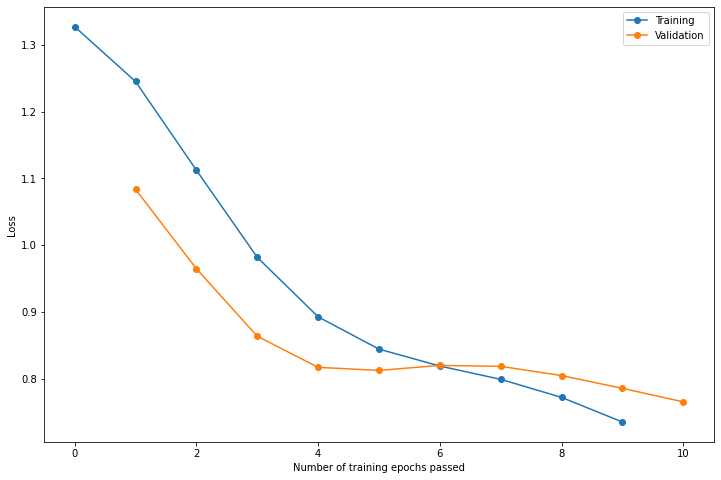

In [27]:
optimizer.plot_errors()

In [34]:
g = np.sign(optimizer.predict(X_val))

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix 
Acc = accuracy_score(y_val,g)
Cm = confusion_matrix(y_val,g)
print("Acurácia:", Acc)
print("Matriz de confusão:")
print(Cm)

Acurácia: 0.7538461538461538
Matriz de confusão:
[[ 27  54]
 [ 10 169]]


(?, 43) -> [... 3 layers ...] -> (?, 1)